## Macroeconomic Risk Factor Analysis

- In this project we will conduct a risk factor analysis of key macroeconomic indicators on the New Zealand NZX50 equity market index.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
plt.style.use('seaborn-whitegrid')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import quandl and personal API key to request macroeconomic data
import quandl
quandl.ApiConfig.api_key = 'p_ochiKnRKWny1z8ty-F' # If replicating notebook, input your quandl API key within these quotes

# Specify start and end dates for our analysis
start_date = '1990-01-01'
end_date = '2020-12-31'

## Selected IMF Macroeconomic Indicators for New Zealand:
- 1. unemployment: Unemployment Rate, % of Total Labour Force
- 2. gdp: GDP at Constant Prices, % Change
- 3. inflation: Inflation % Change, Average Consumer Prices
- 4. investment: NZ Total Investment, % of GDP
- 5. savings: Gross National Savings, % of GDP
- 6. gov_revenue: General Government Revenue, % of GDP

In [3]:
imf_macro_indicators = ['ODA/NZL_LUR', 'ODA/NZL_NGDP_RPCH', 'ODA/NZL_PCPIPCH', 'ODA/NZL_NID_NGDP',
                       'ODA/NZL_NGSD_NGDP', 'ODA/NZL_GGR_NGDP']

imf_nz_data = quandl.get(imf_macro_indicators, start_date = start_date, end_date = end_date)
imf_nz_data.columns = ['unemployment', 'gdp', 'inflation', 'investment', 'savings', 'gov_revenue']

In [4]:
imf_nz_data.iloc[:]

,unemployment,gdp,inflation,investment,savings,gov_revenue
Date,,,,,,
1990-12-31,7.975,1.055,6.063,21.394,17.704,46.663
1991-12-31,10.625,-2.159,2.645,17.133,15.597,46.719
1992-12-31,10.675,0.871,0.998,18.531,15.494,46.118
1993-12-31,9.800,4.876,1.317,20.908,17.663,45.158
1994-12-31,8.350,6.669,1.706,22.389,18.956,44.679
1995-12-31,6.450,4.334,3.754,23.326,19.420,45.208
1996-12-31,6.325,3.728,2.309,23.463,18.343,42.359
1997-12-31,6.875,3.017,1.166,23.160,18.670,40.450
1998-12-31,7.725,0.758,1.264,21.098,18.193,39.574


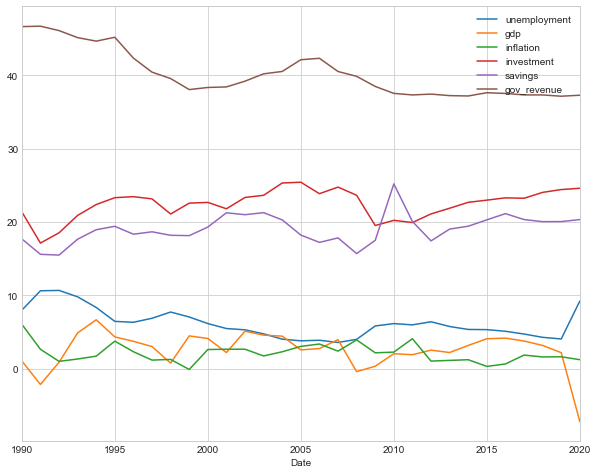

In [5]:
# Time-series plot of selected macroeconomic indicators
imf_nz_data.plot(figsize=(10,8))
plt.show()

In [6]:
# Converting all of the data into yearly percent change. Note that 'gdp' and 'inflation' are already quoted in percent change values, so we do not have to change these variables.

# Selecting the variable columns to convert into percentage terms.
cols = ['unemployment', 'investment', 'savings', 'gov_revenue']

# Creating a new dataframe to carry out this analysis.
df_norm = imf_nz_data.copy() 
df_norm[cols] = imf_nz_data[cols].pct_change()*100
df_norm.dropna(inplace = True)

# Inspecting the new normalised dataset.
df_norm.head()

,unemployment,gdp,inflation,investment,savings,gov_revenue
Date,,,,,,
1991-12-31,33.228840,-2.159,2.645,-19.916799,-11.901265,0.120009
1992-12-31,0.470588,0.871,0.998,8.159692,-0.660383,-1.286415
1993-12-31,-8.196721,4.876,1.317,12.827154,13.998967,-2.081617
1994-12-31,-14.795918,6.669,1.706,7.083413,7.320387,-1.060720
1995-12-31,-22.754491,4.334,3.754,4.185091,2.447774,1.184001


In [7]:
df_norm.tail()

,unemployment,gdp,inflation,investment,savings,gov_revenue
Date,,,,,,
2016-12-31,-4.225352,4.167,0.639,1.365871,4.172208,-0.249734
2017-12-31,-7.352941,3.774,1.854,-0.253186,-3.811235,-0.532680
2018-12-31,-9.523810,3.166,1.596,3.458957,-1.401042,-0.013388
2019-12-31,-5.263158,2.180,1.620,1.596806,0.034901,-0.471332
2020-12-31,127.728395,-7.212,1.224,0.724460,1.365630,0.368626


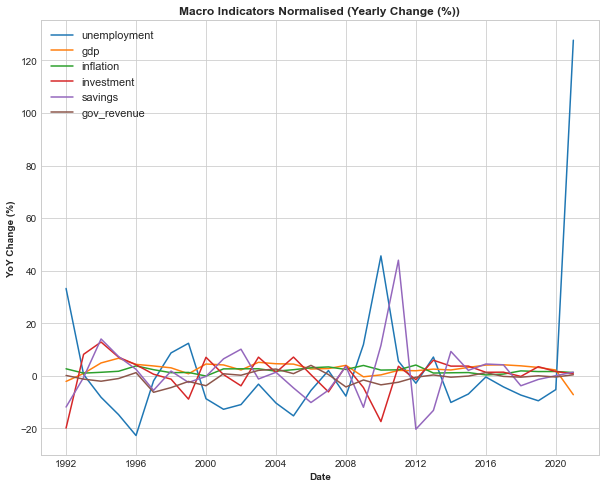

In [8]:
plt.figure(figsize=(10,8))
plt.plot(df_norm)
plt.title('Macro Indicators Normalised (Yearly Change (%))', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('YoY Change (%)', fontweight='bold')
plt.legend(['unemployment', 'gdp', 'inflation', 'investment', 'savings', 'gov_revenue'],
           loc = 'upper left', prop={'size': 11})
plt.show()

Noticable observations from this chart:

- Significant increase in unemployment in 2009 and national savings during the global financial crisis. Unemployment increased by approximately 45% and national savings increased by approximately 50%. 

- In more recent times, the impact of COVID-19 has resulted in an increase in unemployment by over 120% (most of this is likely a result of the shutdown of the tourism industry and closing of the borders affecting tourism/hospitality. Further research could be conducted in this area).

- COVID-19 has led to the largest year-on-year GDP decrease in the 30 years of observations contained in this dataset.

In [9]:
# 1. NZ Unemployment Rate , % of Total Labour Force
# 2. NZ GDP at Constant Prices % Change
# 3. New Zealand Inflation % Change, Average Consumer Prices
# 4. New Zealand Total Investment, % of GDP
# 5. New Zealand Gross National Savings, % of GDP
# 6. New Zealand General Government Revenue, % of GDP

Now, let's import the New Zealand Equity Market Index (The S&P/NZX50).

Note that in some of the observed years, the market was closed on the 31st of December. To align this dataframe with the macroeconomic indicators, I've used the most recent close price (either the 31st, 30th, or 29th) for each end-of-year observation.

In [10]:
# Import S&P/NZX Equity Market Index
nzx = pd.read_csv('NZX50.csv')
nzx = nzx.iloc[:18] # Removing empty cells from the dataframe

nzx['Pct Change'] = nzx['Adj Close'].pct_change()*100 # Create pct_change column
nzx.dropna(inplace=True) # Drop NaN value
nzx.set_index('Date', inplace=True)
nzx.index = pd.to_datetime(nzx.index) # Converting index to datetime format so we can merge df's later
nzx # Inspect the data

,Adj Close,Pct Change
Date,,
2004-12-31,3064.439941,25.061821
2005-12-31,3370.510010,9.987798
2006-12-31,4055.469971,20.322146
2007-12-31,4041.379883,-0.347434
2008-12-31,2715.709961,-32.802408
2009-12-31,3230.149902,18.943111
2010-12-31,3309.030029,2.441996
2011-12-31,3274.709961,-1.037164
2012-12-31,4066.510010,24.179242


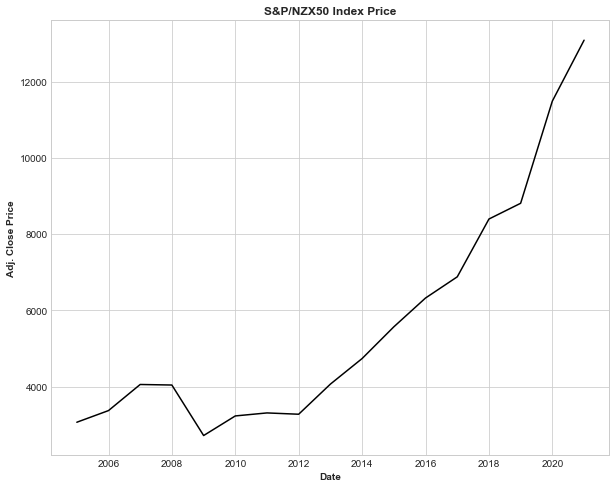

In [34]:
plt.figure(figsize=(10,8))
plt.plot(nzx['Adj Close'], color = 'black')
plt.title('S&P/NZX50 Index Price', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Adj. Close Price', fontweight='bold')
plt.show()

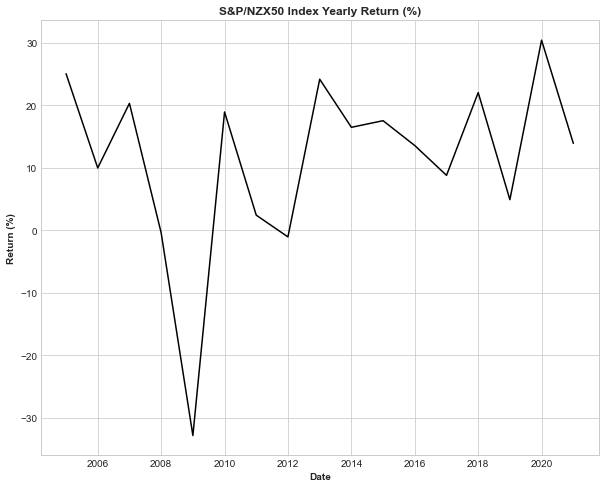

In [12]:
plt.figure(figsize=(10,8))
plt.plot(nzx['Pct Change'], color = 'black')
plt.title('S&P/NZX50 Index Yearly Return (%)', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Return (%)', fontweight='bold')
plt.show()

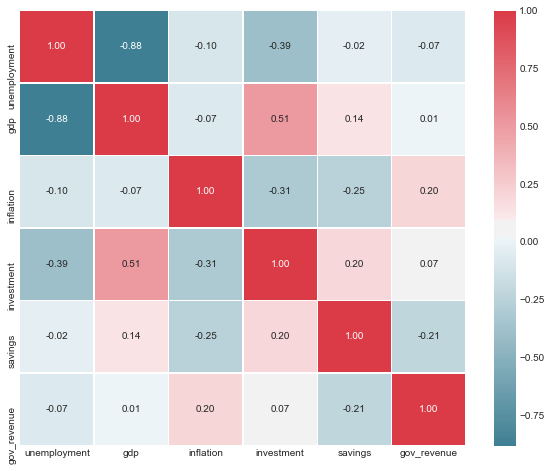

In [53]:
# macroeconomic correlations
macro_corr = df_norm.corr()

plt.figure(figsize=(10,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(macro_corr, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap=cmap);

Key findings from the correlation matrix:
- GDP and total national investment have a strong positive correlation, with a pearson correlation coefficient of 0.51. Therefore, as GDP increases, investment in New Zealand also increases.
- Inflation and total national investment are negatively correlated, with a pearson correlation coefficient of -0.31. Thus, as inflation increases, total national investment decreases.
- GDP and unemployment have a very strong negative correlation. This makes sense intuitively, as more productivity leads to more jobs and less unemployment, which leads to an increasing GDP.

In [14]:
# Combining the NZX50 Returns with the Macroeconomic Indicators
df_new = pd.merge(df_norm, nzx['Pct Change'], left_index = True, right_index = True)

# Rename 'Pct Change' to 'nzx returns'
df_new.rename({'Pct Change':'nzx returns'}, axis=1, inplace = True)

# Inspect the new dataframe
df_new

,unemployment,gdp,inflation,investment,savings,gov_revenue,nzx returns
Date,,,,,,,
2004-12-31,-15.263158,4.435,2.306,7.099666,-4.628759,0.800597,25.061821
2005-12-31,-5.590062,2.563,3.038,0.414561,-10.189702,3.951458,9.987798
2006-12-31,1.973684,2.741,3.361,-6.145559,-5.497339,0.460326,20.322146
2007-12-31,-7.741935,3.956,2.393,3.762044,3.558781,-4.256224,-0.347434
2008-12-31,11.888112,-0.403,3.925,-4.497739,-12.008073,-1.618315,-32.802408
2009-12-31,45.625000,0.332,2.162,-17.443139,11.531600,-3.457874,18.943111
2010-12-31,5.579399,2.038,2.257,3.615322,43.979207,-2.467468,2.441996
2011-12-31,-2.845528,1.904,4.084,-1.487595,-20.345170,-0.556576,-1.037164
2012-12-31,7.112971,2.528,1.034,5.914815,-13.194202,0.299930,24.179242


- The new dataframe combines the NZX market returns with the normalised macroeconomic indicators. Note that NZX50 data from Yahoo Finance prior to 2003 is not publicly available. For this reason, we've condensed the macroeconomic dataframe by starting from 2004, rather than 1991 as seen earlier in the code.

In [15]:
# Inspecting the new dataframe to ensure there are no missing values or conflicting 'Dtypes'.
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2004-12-31 to 2020-12-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unemployment  17 non-null     float64
 1   gdp           17 non-null     float64
 2   inflation     17 non-null     float64
 3   investment    17 non-null     float64
 4   savings       17 non-null     float64
 5   gov_revenue   17 non-null     float64
 6   nzx returns   17 non-null     float64
dtypes: float64(7)
memory usage: 1.1 KB


In [16]:
# Viewing the summary statistics of our dataframe. 
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
unemployment,17.0,7.324797,33.898162,-15.263158,-7.352941,-4.225352,5.579399,127.728395
gdp,17.0,2.095294,2.728747,-7.212000,2.038000,2.563000,3.774000,4.435000
inflation,17.0,2.008765,1.097319,0.308000,1.220000,1.854000,2.393000,4.084000
investment,17.0,0.398988,5.701942,-17.443139,-0.253186,1.365871,3.661425,7.099666
savings,17.0,0.549845,13.937285,-20.345170,-5.497339,0.034901,4.172208,43.979207
gov_revenue,17.0,-0.425807,1.853859,-4.256224,-0.556576,-0.249734,0.368626,3.951458
nzx returns,17.0,11.439764,14.607056,-32.802408,4.920047,13.920581,20.322146,30.422754


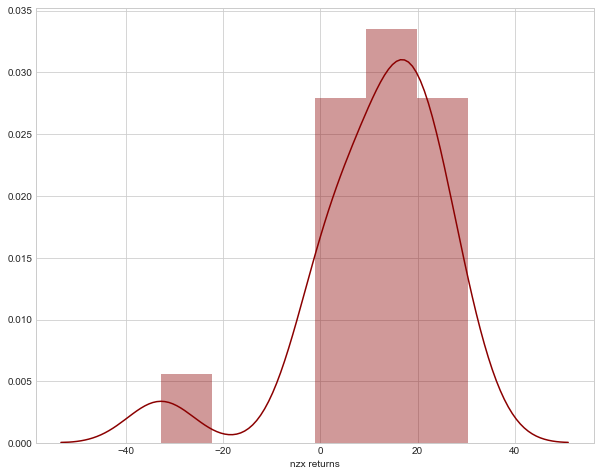

In [63]:
# Plotting the yearly return distributions of the NZX50 index
plt.figure(figsize=(10,8))
sns.distplot(df_new['nzx returns'], color = 'darkred');

- From the yearly returns distribution plot above, we can see that from 2004, every year except 2007, and 2008 resulted in positive returns. In 2007, the return was very slightly negative, while in 2008 the NZ equity markets suffered from the tailwind of the global financial crisis, resulting in a 32% decline in the NZX50 index. 
- Most yearly returns in this time period are within the 0-30% range.

In [18]:
# Let's look at the correlation between the NZX market returns and the select macroeconomic indicators
nzx_corr = df_new.corr().iloc[6:,:6].T

# Sorting the correlation coefficients by highest-to-lowest value
nzx_corr.sort_values('nzx returns', ascending = False, inplace = True)

# Printing the correlation values
nzx_corr

,nzx returns
gov_revenue,0.286369
gdp,0.181794
investment,0.130357
savings,0.061225
unemployment,-0.010258
inflation,-0.513556


NZX50/Macroeconomic Correlation Interpretation:
- We can see that the S&P/NZX50 is most correlated with government revenue (0.28), GDP (0.18), national investment (0.13), and national savings (0.06). 
- It is practically uncorrelated with unemployment (-0.01), while strongly negatively correlated with inflation (-0.51).

In [19]:
# import library for linear regression
import statsmodels.api as sm

In [20]:
y = df_new['nzx returns']
X = df_new.iloc[:,:6]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [21]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.065   
Dependent Variable: nzx returns      AIC:                143.2483
Date:               2021-03-01 23:55 BIC:                149.0808
No. Observations:   17               Log-Likelihood:     -64.624 
Df Model:           6                F-statistic:        1.186   
Df Residuals:       10               Prob (F-statistic): 0.386   
R-squared:          0.416            Scale:              199.46  
-----------------------------------------------------------------
                  Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-----------------------------------------------------------------
const             8.3442  20.0504  0.4162 0.6861 -36.3309 53.0193
unemployment      0.3629   0.3950  0.9185 0.3800  -0.5174  1.2431
gdp               5.1114   4.6866  1.0906 0.3010  -5.3310 15.5537
inflation        -4.5820   4.6911 -0.9767 0.3517 -15.0344  5.8704
investment       -0.2133   0.7973 -0.2676 0.7945  -1.9897  1.5631
savings           0.0093   0.3093  0.0301 0.9766  -0.6799  0.6985
gov_revenue       2.3204   2.2893  1.0136 0.3347  -2.7805  7.4214
-----------------------------------------------------------------
Omnibus:               0.575        Durbin-Watson:          2.169
Prob(Omnibus):         0.750        Jarque-Bera (JB):       0.327
Skew:                  -0.318       Prob(JB):               0.849
Kurtosis:              2.761        Condition No.:          206  
=================================================================

"""

In [22]:
y = df_new['nzx returns']
X = df_new.loc[:,'inflation']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.215   
Dependent Variable: nzx returns      AIC:                137.1795
Date:               2021-03-01 23:55 BIC:                138.8460
No. Observations:   17               Log-Likelihood:     -66.590 
Df Model:           1                F-statistic:        5.373   
Df Residuals:       15               Prob (F-statistic): 0.0350  
R-squared:          0.264            Scale:              167.57  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
const        25.1722    6.7047   3.7544  0.0019   10.8815  39.4629
inflation    -6.8362    2.9492  -2.3180  0.0350  -13.1222  -0.5502
-----------------------------------------------------------------
Omnibus:               2.620        Durbin-Watson:          2.158
Prob(Omnibus):         0.270        Jarque-Bera (JB):       1.148
Skew:                  -0.613       Prob(JB):               0.563
Kurtosis:              3.342        Condition No.:          6    
=================================================================

"""

In [23]:
print('Parameters: ', model.params)
print('Coefficient P-Values: ', model.pvalues)
print('R2: ', model.rsquared)

Parameters:  const        25.172167
inflation    -6.836243
dtype: float64
Coefficient P-Values:  const        0.001914
inflation    0.034983
dtype: float64
R2:  0.2637397284190597


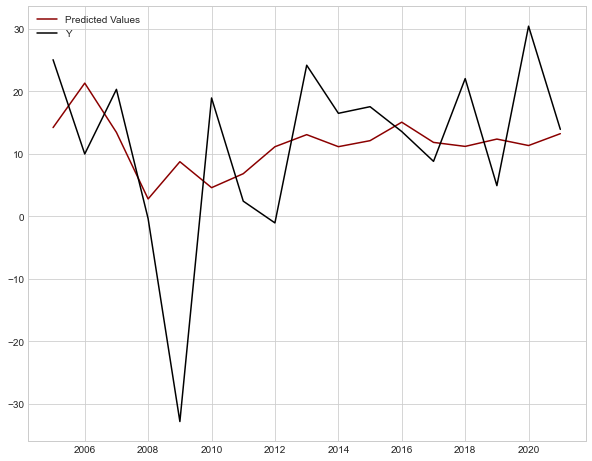

In [39]:
# Plotting linear regression predictions (y^) vs. y_true:

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(predictions, color = 'darkred', label = 'Predicted Values')
ax.plot(y, color = 'black', label = 'Y')
ax.legend(loc = 'best');

In [40]:
# Using a loop to perform single linear regression for each macroeconomic indicator on the nzx returns
independent_variables = ['unemployment', 'gdp', 'inflation', 'investment', 'savings', 'gov_revenue']

models = []

for i in independent_variables:
    y = df_new['nzx returns']
    X = df_new[i]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    models.append(model)

In [41]:
# Looping through the parameters of each regression to extract and store the pvalues of each risk-factor
pvalue = []

for var in range(6):
    p_val = models[var].pvalues
    pvalue.append(p_val)

# Printing the p-values of the alpha (coefficient) and beta of each single linear regression
print(pvalue)

[const           0.007931
unemployment    0.968831
dtype: float64, const    0.058406
gdp      0.484979
dtype: float64, const        0.001914
inflation    0.034983
dtype: float64, const         0.007189
investment    0.618009
dtype: float64, const      0.007022
savings    0.815431
dtype: float64, const          0.003630
gov_revenue    0.265135
dtype: float64]


In [42]:
# Looping through the parameters of each regression to extract and store the risk-factor betas
betas = []

for var in range(6):
    beta = models[var].params[1]
    betas.append(beta)
    
betas_df = pd.DataFrame(betas)
betas_df.rename(index={0: 'unemployment', 1: 'gdp', 2: 'inflation', 
                    3: 'investment', 4: 'savings', 5: 'gov_revenue'}, inplace = True)
betas_df.columns = ['Risk-Factor Beta']
betas_df.sort_values('Risk-Factor Beta', ascending = False, inplace = True)
# print(betas_df)

In [43]:
rsq = []

for var in range(6):
    r2 = models[var].rsquared
    rsq.append(r2)
    
rsq_df = pd.DataFrame(rsq)
rsq_df.rename(index={0: 'unemployment', 1: 'gdp', 2: 'inflation', 
                    3: 'investment', 4: 'savings', 5: 'gov_revenue'}, inplace = True)
rsq_df.columns = ['R Squared']
rsq_df.sort_values('R Squared', ascending = False, inplace = True)
# print(rsq_df)

In [44]:
model_params = pd.merge(rsq_df, betas_df, left_index=True, right_index=True)
model_params

,R Squared,Risk-Factor Beta
inflation,0.263740,-6.836243
gov_revenue,0.082007,2.256378
gdp,0.033049,0.973149
investment,0.016993,0.333945
savings,0.003748,0.064167
unemployment,0.000105,-0.004420


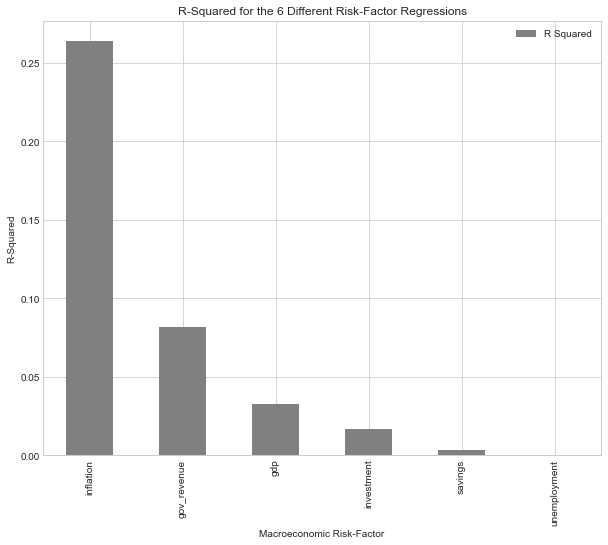

In [45]:
# Plotting the R-Squared for the 6 different single linear regressions
model_params.iloc[:,0].plot(figsize=(10,8), kind='bar', color = 'grey')
plt.legend()
plt.title('R-Squared for the 6 Different Risk-Factor Regressions')
plt.xlabel('Macroeconomic Risk-Factor')
plt.ylabel('R-Squared')
plt.show()

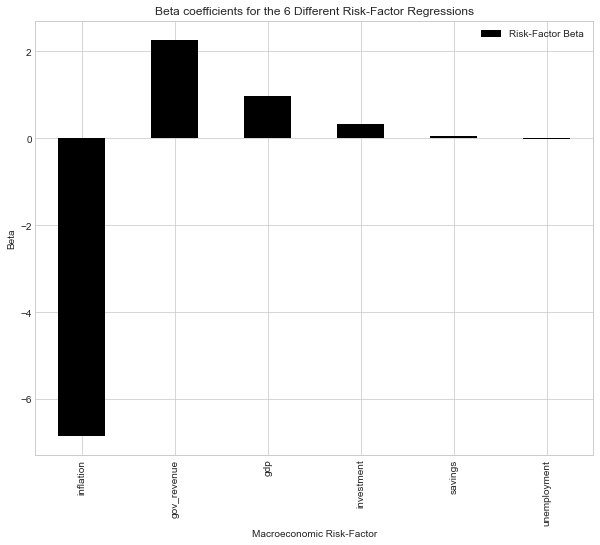

In [46]:
# Plotting the risk-factor beta's
model_params.iloc[:,1].plot(figsize=(10,8), kind='bar', color = 'black')
plt.legend()
plt.title('Beta coefficients for the 6 Different Risk-Factor Regressions')
plt.xlabel('Macroeconomic Risk-Factor')
plt.ylabel('Beta')
plt.show()

In [47]:
models[2].summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.215   
Dependent Variable: nzx returns      AIC:                137.1795
Date:               2021-03-01 23:57 BIC:                138.8460
No. Observations:   17               Log-Likelihood:     -66.590 
Df Model:           1                F-statistic:        5.373   
Df Residuals:       15               Prob (F-statistic): 0.0350  
R-squared:          0.264            Scale:              167.57  
------------------------------------------------------------------
              Coef.   Std.Err.     t     P>|t|    [0.025    0.975]
------------------------------------------------------------------
const        25.1722    6.7047   3.7544  0.0019   10.8815  39.4629
inflation    -6.8362    2.9492  -2.3180  0.0350  -13.1222  -0.5502
-----------------------------------------------------------------
Omnibus:               2.620        Durbin-Watson:          2.158
Prob(Omnibus):         0.270        Jarque-Bera (JB):       1.148
Skew:                  -0.613       Prob(JB):               0.563
Kurtosis:              3.342        Condition No.:          6    
=================================================================

"""

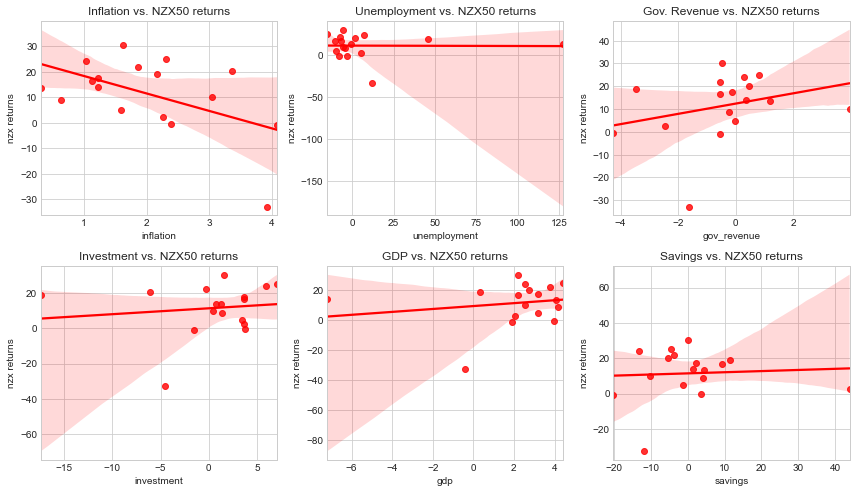

In [52]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(331)
ax1.set_xlabel('inflation (%)')
ax1.set_ylabel('nzx returns (%)')
ax1.set_title('Inflation vs. NZX50 returns')
sns.regplot(x = df_new['inflation'], y = df_new['nzx returns'], color = 'red')

ax2 = fig.add_subplot(332)
ax2.set_xlabel('unemployment (%)')
ax2.set_ylabel('nzx returns (%)')
ax2.set_title('Unemployment vs. NZX50 returns')
sns.regplot(x = df_new['unemployment'], y = df_new['nzx returns'], color = 'red')

ax3 = fig.add_subplot(333)
ax3.set_xlabel('gov revenue (%)')
ax3.set_ylabel('nzx returns (%)')
ax3.set_title('Gov. Revenue vs. NZX50 returns')
sns.regplot(x = df_new['gov_revenue'], y = df_new['nzx returns'], color = 'red')

ax4 = fig.add_subplot(334)
ax4.set_xlabel('investment (%)')
ax4.set_ylabel('nzx returns (%)')
ax4.set_title('Investment vs. NZX50 returns')
sns.regplot(x = df_new['investment'], y = df_new['nzx returns'], color = 'red')

ax5 = fig.add_subplot(335)
ax5.set_xlabel('GDP (%)')
ax5.set_ylabel('nzx returns (%)')
ax5.set_title('GDP vs. NZX50 returns')
sns.regplot(x = df_new['gdp'], y = df_new['nzx returns'], color = 'red')

ax6 = fig.add_subplot(336)
ax6.set_xlabel('savings (%)')
ax6.set_ylabel('nzx returns (%)')
ax6.set_title('Savings vs. NZX50 returns')
sns.regplot(x = df_new['savings'], y = df_new['nzx returns'], color = 'red')

plt.tight_layout()
plt.show()